In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df_train = pd.read_csv("..\\data\\raw\\train.csv")

df_train.head()

C:\Users\Serge Cliver KANA\AppData\Local\Temp\ipykernel_9040\2841811005.py:1: DtypeWarning:

Columns (435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506) have mixed types. Specify dtype option on import or set low_memory=False.



,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
0,p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
1,p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
2,p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
3,p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
4,p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7


In [4]:
df_train.shape

(177024, 508)

How many observations for each patient?

In [5]:
df_train[["id","p_num"]].groupby("p_num").describe()

id                       
       count unique        top freq
p_num                              
p01     8459   8459   p01_8458    1
p02    25872  25872  p02_25871    1
p03    26028  26028  p03_26027    1
p04    24686  24686  p04_24685    1
p05     8288   8288   p05_8248    1
p06     8383   8383   p06_8382    1
p10    25454  25454  p10_25453    1
p11    24555  24555  p11_24554    1
p12    25299  25299  p12_25298    1

**Comment**:</br>
The number of observations per patient differs.

What time range do we have in our dataset?

In [6]:
time_ranges = sorted(df_train["time"].unique())
print("Number of time Observations:", len(time_ranges))
print("Time Ranges:")
print(time_ranges)

#df_train[["time","p_num"]].groupby("p_num").describe()

Number of time Observations: 288
Time Ranges:
['00:00:00', '00:05:00', '00:10:00', '00:15:00', '00:20:00', '00:25:00', '00:30:00', '00:35:00', '00:40:00', '00:45:00', '00:50:00', '00:55:00', '01:00:00', '01:05:00', '01:10:00', '01:15:00', '01:20:00', '01:25:00', '01:30:00', '01:35:00', '01:40:00', '01:45:00', '01:50:00', '01:55:00', '02:00:00', '02:05:00', '02:10:00', '02:15:00', '02:20:00', '02:25:00', '02:30:00', '02:35:00', '02:40:00', '02:45:00', '02:50:00', '02:55:00', '03:00:00', '03:05:00', '03:10:00', '03:15:00', '03:20:00', '03:25:00', '03:30:00', '03:35:00', '03:40:00', '03:45:00', '03:50:00', '03:55:00', '04:00:00', '04:05:00', '04:10:00', '04:15:00', '04:20:00', '04:25:00', '04:30:00', '04:35:00', '04:40:00', '04:45:00', '04:50:00', '04:55:00', '05:00:00', '05:05:00', '05:10:00', '05:15:00', '05:20:00', '05:25:00', '05:30:00', '05:35:00', '05:40:00', '05:45:00', '05:50:00', '05:55:00', '06:00:00', '06:05:00', '06:10:00', '06:15:00', '06:20:00', '06:25:00', '06:30:00', '06:3

**Comment:**</br>
We have 288 time observations from 00:00 to 23:55 every 5 minutes steps  and they correspond to a whole day (24*60 / 5) of observations.</br>
However, there are some missing observations at some time points across different patients.


Convert the time in format HH:MM:SS into pandas datetime format for easier manipulation

In [7]:
df_train["time"] = df_train["time"].apply(lambda x: pd.to_datetime(x,format='%H:%M:%S').time())
df_train.head()

,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
0,p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
1,p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
2,p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
3,p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
4,p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7


# Check the number of missing values for each group of columns

In [8]:
#get all the columns from the dataset
columns = df_train.columns.tolist()
#create a dict that will contains variables that match a pattern
group_cols = dict()


interest_cols = ["hr","bg","insulin","carbs","steps","cals","activity"]
for interest_col in interest_cols: 

    #find all the colums that start_with the same pattern (e.g "hr","bg"...)
    cols_match_interest = list(filter(lambda x:x != 0,
                                     list(
                                         map(lambda col: col if col.startswith(interest_col) else 0,columns))))
    #add them in a list
    group_cols[interest_col] = cols_match_interest

    #remove them from original list of columns
    columns = list(set(columns) - set(cols_match_interest))
c = 0


#here we just print the result of the groups using a format we have chosen
print("The group of colums are ",end=":")
print("[common_pattern,example_col, number]")
for key in group_cols.keys():
    c = c + len(group_cols[key])
    print(f"[{key},{group_cols[key][0]},{len(group_cols[key])} ]")
print(c) 

The group of colums are :[common_pattern,example_col, number]
[hr,hr-5:55,72 ]
[bg,bg-3:35,73 ]
[insulin,insulin-1:50,72 ]
[carbs,carbs-2:30,72 ]
[steps,steps-3:25,72 ]
[cals,cals-3:45,72 ]
[activity,activity-2:25,72 ]
505


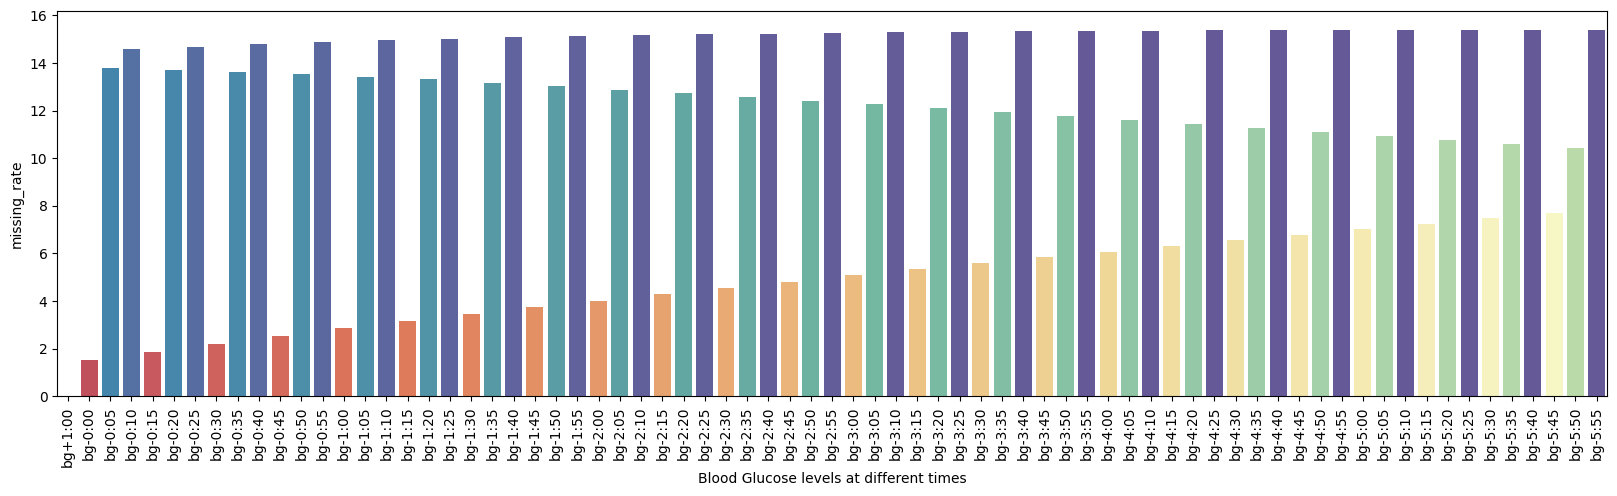

In [10]:
plt.figure(figsize=(20,5))
cols= group_cols["bg"]
#data = pd.DataFrame(100 * df_train[cols].isna().sum() / df_train.shape[0],index=cols,columns=["missing_rate"]).sort_values(ascending=False,by="missing_rate")

data = pd.DataFrame(100 * df_train[cols].isna().sum() / df_train.shape[0],index=cols,columns=["missing_rate"]).sort_index()
sns.barplot(data,x=data.index,hue=data.missing_rate,y=data.missing_rate,palette="Spectral",legend=False)
plt.xticks(rotation=90);
plt.xlabel("Blood Glucose levels at different times");

**Comment:** </br>
* According to the above plot, we can see that, the target **(bg-1:00)** column has **no** missing values.</br>
* However, the past bg columns have different missing values ratios. In fact, there is a "strange" pattern that is spotted on the plot. </br>
* Depending on the starting point from bg-0:00 / bg-0:05 / bg-0:10, the missing values ratios are are increasing/decreasing every 15 min intervals.
* We can also form groups of columns, the first group can be the "red" ones having missing values ratios within [1.8-7.5]
* The second group can be the "green" ones having missing values ratios within [11.2-14]
* The third group can be the "mauve" ones having missing values ratios within [14.2-16]


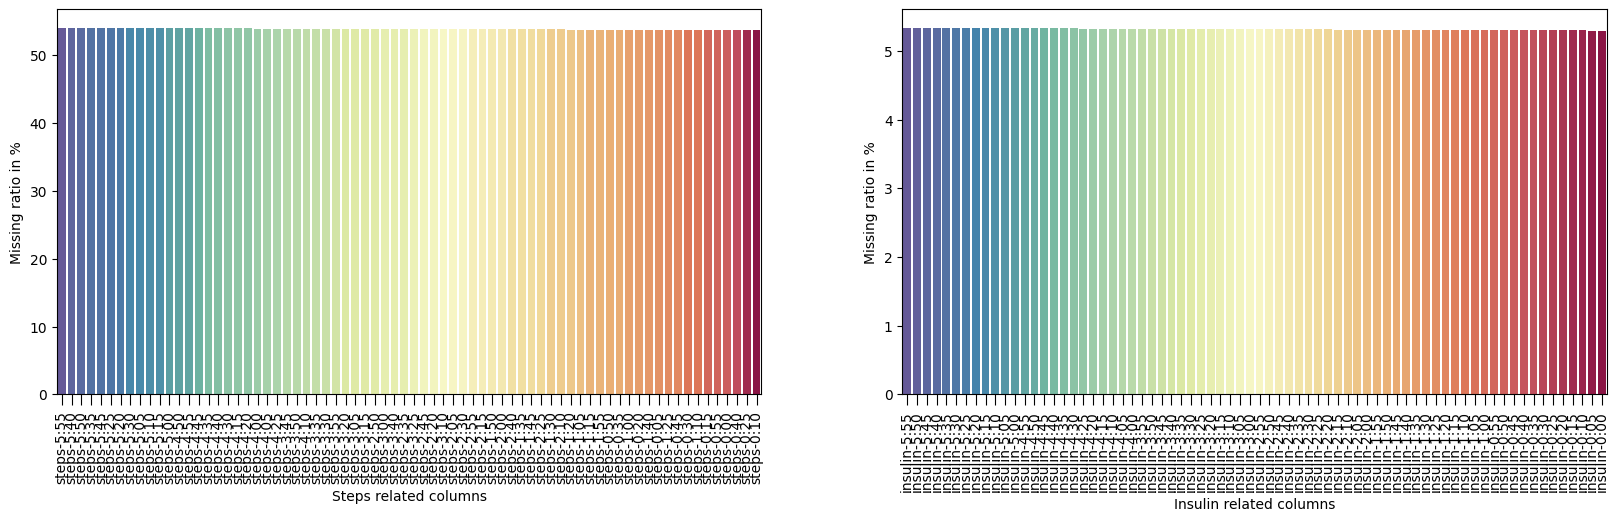

In [34]:
fig, ax = plt.subplots(1,2,figsize=(20,5))


#first plot
cols= group_cols["steps"]
data = pd.DataFrame(100 * df_train[cols].isna().sum() / df_train.shape[0],index=cols,columns=["missing_rate"]).sort_values(ascending=False,by="missing_rate")
sns.barplot(data,x=data.index,hue=data.missing_rate,y=data.missing_rate,palette="Spectral",legend=False,ax=ax[0])
ax[0].set_xlabel("Steps related columns")
ax[0].set_ylabel("Missing ratio in %")

ax[0].tick_params(axis="x",rotation=90,size=8);



#second plot
cols= group_cols["insulin"]
data = pd.DataFrame(100 * df_train[cols].isna().sum() / df_train.shape[0],index=cols,columns=["missing_rate"]).sort_values(ascending=False,by="missing_rate")
sns.barplot(data,x=data.index,hue=data.missing_rate,y=data.missing_rate,palette="Spectral",legend=False,ax=ax[1])
ax[1].set_xlabel("Insulin related columns")
ax[1].set_ylabel("Missing ratio in %")
ax[1].tick_params(axis="x",rotation=90,size=8);




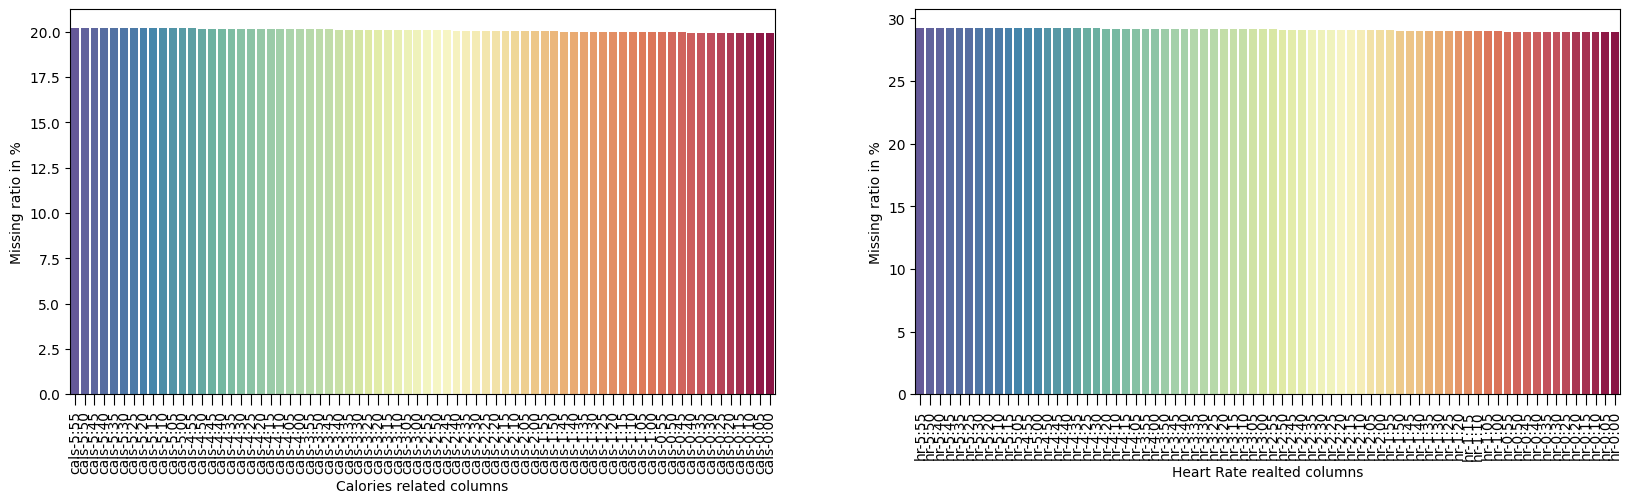

In [12]:
fig, ax = plt.subplots(1,2,figsize=(20,5))


cols= group_cols["cals"]
data = pd.DataFrame(100 * df_train[cols].isna().sum() / df_train.shape[0],index=cols,columns=["missing_rate"]).sort_values(ascending=False,by="missing_rate")
sns.barplot(data,x=data.index,hue=data.missing_rate,y=data.missing_rate,palette="Spectral",legend=False,ax=ax[0])
ax[0].set_ylabel("Missing ratio in %")
ax[0].set_xlabel("Calories related columns")
ax[0].tick_params(axis="x",rotation=90,size=8);

#second plot
cols= group_cols["hr"]
data = pd.DataFrame(100 * df_train[cols].isna().sum() / df_train.shape[0],index=cols,columns=["missing_rate"]).sort_values(ascending=False,by="missing_rate")
sns.barplot(data,x=data.index,hue=data.missing_rate,y=data.missing_rate,palette="Spectral",legend=False,ax=ax[1])
ax[1].set_xlabel("Heart Rate realted columns")
ax[1].set_ylabel("Missing ratio in %")
ax[1].tick_params(axis="x",rotation=90,size=8);


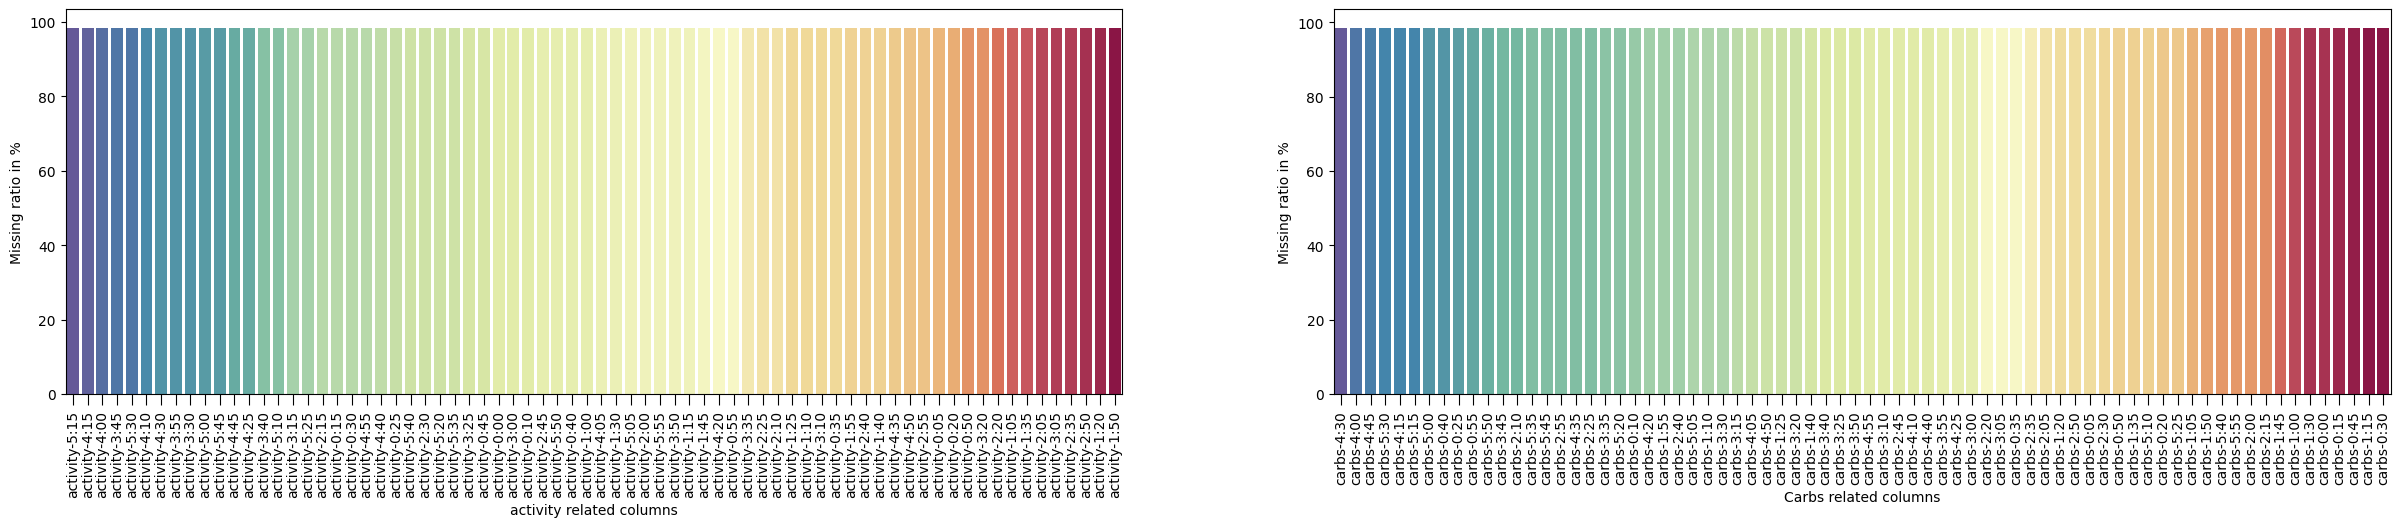

In [35]:
fig, ax = plt.subplots(1,2,figsize=(30,5))


cols= group_cols["activity"]
data = pd.DataFrame(100 * df_train[cols].isna().sum() / df_train.shape[0],index=cols,columns=["missing_rate"]).sort_values(ascending=False,by="missing_rate")
sns.barplot(data,x=data.index,hue=data.missing_rate,y=data.missing_rate,palette="Spectral",legend=False,ax=ax[0])
ax[0].set_xlabel("activity related columns")
ax[0].set_ylabel("Missing ratio in %")
ax[0].tick_params(axis="x",rotation=90,size=8);

#second plot
cols= group_cols["carbs"]
data = pd.DataFrame(100 * df_train[cols].isna().sum() / df_train.shape[0],index=cols,columns=["missing_rate"]).sort_values(ascending=False,by="missing_rate")
sns.barplot(data,x=data.index,hue=data.missing_rate,y=data.missing_rate,palette="Spectral",legend=False,ax=ax[1])
ax[1].set_ylabel("Missing ratio in %")

ax[1].set_xlabel("Carbs related columns")
ax[1].tick_params(axis="x",rotation=90,size=8);




From the previous plots, we can see that the **Carbohydrate** & **activity** columns have all together a missing ratio close to 100%. </br>Unless finding another complementary data source, we will consider deleting them and impute the missing values in other columns.</br> More on that later.</br>

Plot the Blood glucose evolution over time

In [14]:
#group the data by time values
data = df_train[["bg+1:00","time"]].groupby("time").mean()

# Create a line plot
fig = px.line(data, x=data.index, y='bg+1:00', title='1 HOUR ahead Blood Glucose over time')

# Show the plot
fig.show()

**Comment:</br>**
As expected, the glucose levels at "sleep time" between 00H and 06H are on average decreasing most likely to fasting and reduce of activity.</br>
Therefore, the time feature might be helpful to predict the 1 hour ahead **blood glucose**.

Plot the blood Glucose levels for 9 individuals within the data set.

In [15]:

#group the data by time values
data = df_train[["bg+1:00","time","p_num"]].groupby(["p_num","time"]).mean().reset_index()

# Create a line plot
fig = px.line(data, x="time", y='bg+1:00',color="p_num", title='1 HOUR ahead Blood Glucose over time')

# Show the plot
fig.show()

**Comment:</br>**
The blood glucose levels are quite different from one participants to another, which is conceivable given that they may be doing different activities, having different carbohydrate intakes, etc.

Plot the average blood glucose levels and the average carbs consummed over time


In [16]:
#group the data by time values
data = df_train[["bg+1:00","time","cals-0:00","carbs-0:00",'insulin-0:00','hr-0:00','steps-0:00',"bg-0:00"]].groupby("time").mean().reset_index()

#normalize the data
data[data.columns[1:]] = data[data.columns[1:]].apply(lambda col:((col - col.min()) / (col.max() - col.min())))
# Create a line plot
fig = px.line(data, x="time", y=data.columns[1:], title='1 HOUR ahead Blood Glucose over time')

# Show the plot
fig.show()


**Comment:</br>**
* Heart rate and step at 0:00 appears to follow the same trend over the 24H across all patiens. Which is expected as the heart rate increases when the body is doing more steps. We will see later on if they are indeed correlated with one another.
* Blood gluscose vs Insulin levels (~1h before):</br>



Analyze the correlation between each groups of columns (eg. bg, hr,etc) with the target

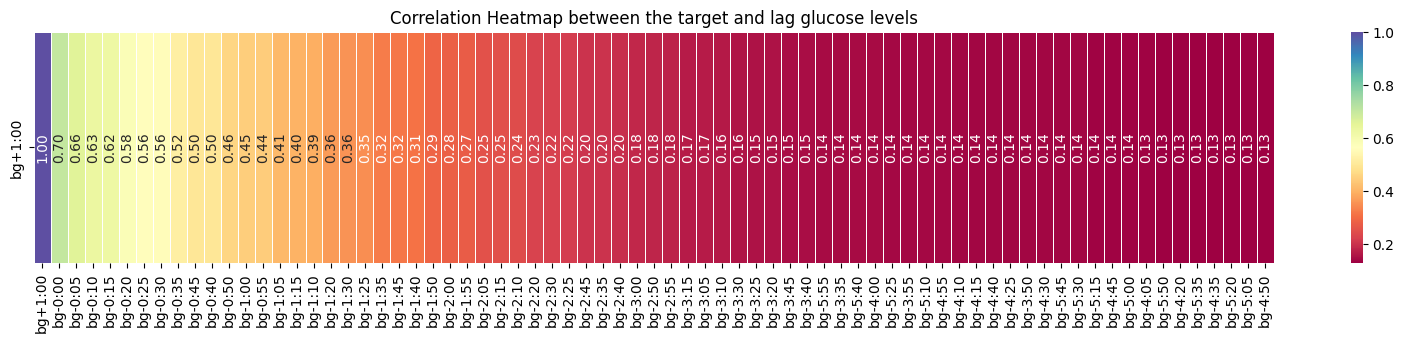

In [17]:
plt.figure(figsize=(20,3))
cols = sorted(group_cols["bg"])[:]
data = df_train[cols].corr()[["bg+1:00"]]
data = data.sort_values(by="bg+1:00",ascending=False).T
plt.title("Correlation Heatmap between the target and lag glucose levels")
heatmap = sns.heatmap(data,cmap="Spectral",linewidths=0.5,annot=True,fmt='.2f')
for text in heatmap.texts:
    text.set_rotation(90)  # Set annotations to horizontal;

**Comment:**</br>
The more we go back in time, the lower the correlation between the 1 hour ahead glucose level and the bg at higher past time steps.
The correlation between the 1 hour ahead glucose level and the bg 1 hour before is the highest, meaning it can be a very good feature to predict the target.

In [31]:
df_train["insulin-0:00"] = df_train["insulin-0:00"].apply(lambda x:x * np.exp(-decay_rate * int(col[-4])))

In [32]:
cols = sorted(group_cols["insulin"])[:]

data = df_train[cols].copy()

decay_rate = 0.02

for col in cols:
    data[col] = data[col].apply(lambda x:x * np.exp(-decay_rate * int(col[-4])))
data

,insulin-0:00,insulin-0:05,insulin-0:10,insulin-0:15,insulin-0:20,insulin-0:25,insulin-0:30,insulin-0:35,insulin-0:40,insulin-0:45,...,insulin-5:10,insulin-5:15,insulin-5:20,insulin-5:25,insulin-5:30,insulin-5:35,insulin-5:40,insulin-5:45,insulin-5:50,insulin-5:55
0,0.037732,0.0417,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,...,0.007510,0.007510,0.007510,0.007510,0.007510,0.007510,0.007510,0.007510,0.007510,0.007510
1,0.037732,0.0417,0.0417,0.0417,0.0417,0.0583,0.0583,0.0583,0.0583,0.0583,...,0.007510,0.007510,0.007510,0.007510,0.007510,0.007510,0.007510,0.007510,0.007510,0.007510
2,0.037732,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0583,0.0583,...,0.007510,0.007510,0.007510,0.007510,0.007510,0.007510,0.007510,0.007510,0.007510,0.007510
3,0.037732,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,...,0.007510,0.007510,0.007510,0.007510,0.007510,0.007510,0.007510,0.007510,0.007510,0.007510
4,0.037732,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,...,0.007510,0.007510,0.007510,0.007510,0.007510,0.007510,0.007510,0.007510,0.007510,0.007510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177019,0.248830,0.9600,0.2750,0.2500,0.2750,0.2750,0.2500,0.2750,0.2500,0.2750,...,0.248830,0.226209,0.248830,0.280500,0.506709,1.167240,0.113105,0.067863,0.045242,0.248830
177020,0.959128,0.2750,0.9600,0.2750,0.2500,0.2750,0.2750,0.2500,0.2750,0.2500,...,0.000000,0.248830,0.226209,0.248830,0.280500,0.506709,1.167240,0.113105,0.067863,0.045242
177021,0.506709,1.0600,0.2750,0.9600,0.2750,0.2500,0.2750,0.2750,0.2500,0.2750,...,0.045242,0.000000,0.248830,0.226209,0.248830,0.280500,0.506709,1.167240,0.113105,0.067863
177022,0.045242,0.5600,1.0600,0.2750,0.9600,0.2750,0.2500,0.2750,0.2750,0.2500,...,0.045242,0.045242,0.000000,0.248830,0.226209,0.248830,0.280500,0.506709,1.167240,0.113105


In [251]:
test = data.copy()

In [19]:
data["bg+1:00"] = df_train["bg+1:00"]

C:\Users\Serge Cliver KANA\AppData\Local\Temp\ipykernel_9040\3839004962.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



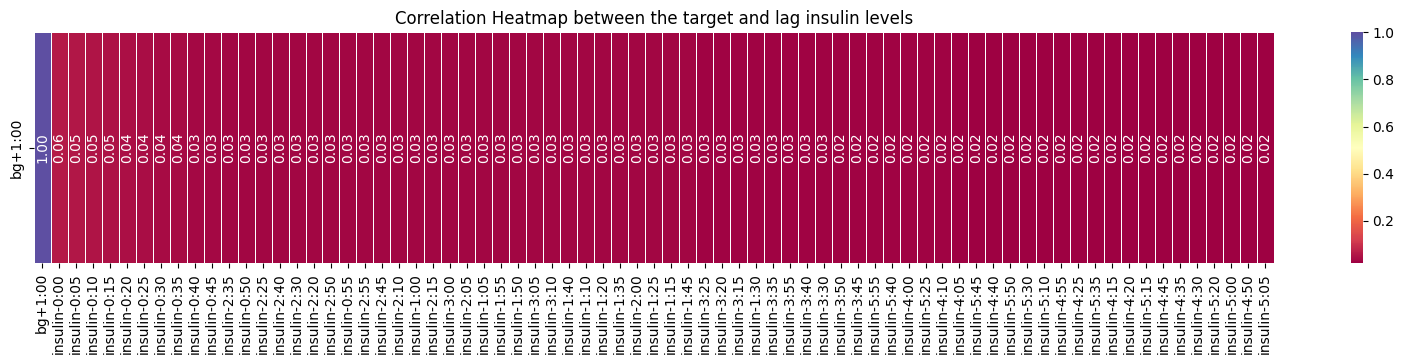

In [33]:
plt.figure(figsize=(20,3))
cols = sorted(group_cols["insulin"])[:]
cols.insert(0,"bg+1:00")
data = df_train[cols].corr()[["bg+1:00"]]
data = data.sort_values(by="bg+1:00",ascending=False).T
plt.title("Correlation Heatmap between the target and lag insulin levels")
heatmap = sns.heatmap(data,cmap="Spectral",linewidths=0.5,annot=True,fmt='.2f')
for text in heatmap.texts:
    text.set_rotation(90)  # Set annotations to horizontal;

**Comment:**</br>
According to the plot above, there is no linear correlation between the target varable and insulin levels at different times.</br>
However, according to the litterature, the effect of "insulin" decay over time in exponentially decreasing way.  Therefore, transforming the insulin variable in way that is close to the physiological decay of insulin might help to predict the target variable.</br>

In addition, it's established in the literature that the effect of "insulin" has a non-linear effect on the blood glucose. Therefore, having no correlation is not a suprise.

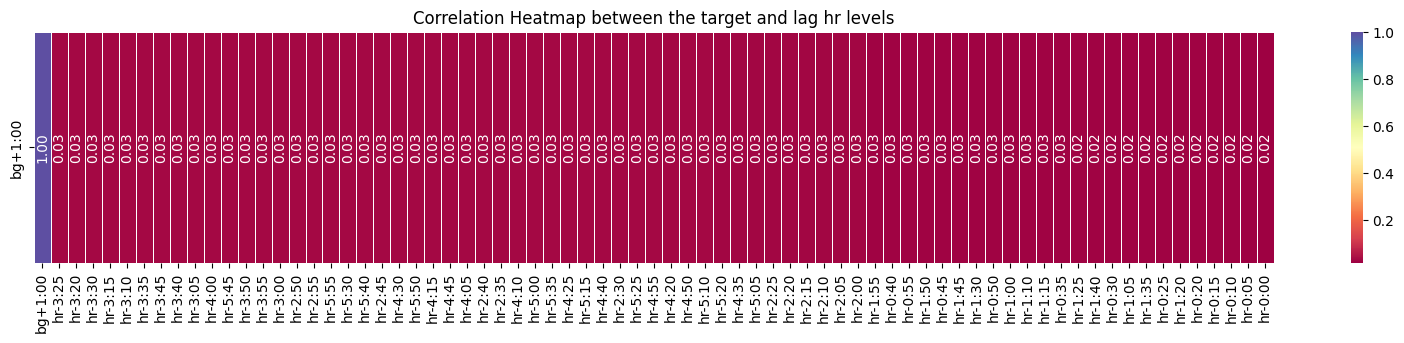

In [237]:
plt.figure(figsize=(20,3))
cols = sorted(group_cols["hr"])[:]
cols.insert(0,"bg+1:00")
data = df_train[cols].corr()[["bg+1:00"]]
data = data.sort_values(by="bg+1:00",ascending=False).T
plt.title("Correlation Heatmap between the target and lag hr levels")
heatmap = sns.heatmap(data,cmap="Spectral",linewidths=0.5,annot=True,fmt='.2f')
for text in heatmap.texts:
    text.set_rotation(90)  # Set annotations to horizontal;

**Comment:**
Like with the insulin levels, there is no linear correlation between the target and the heart rates variables.

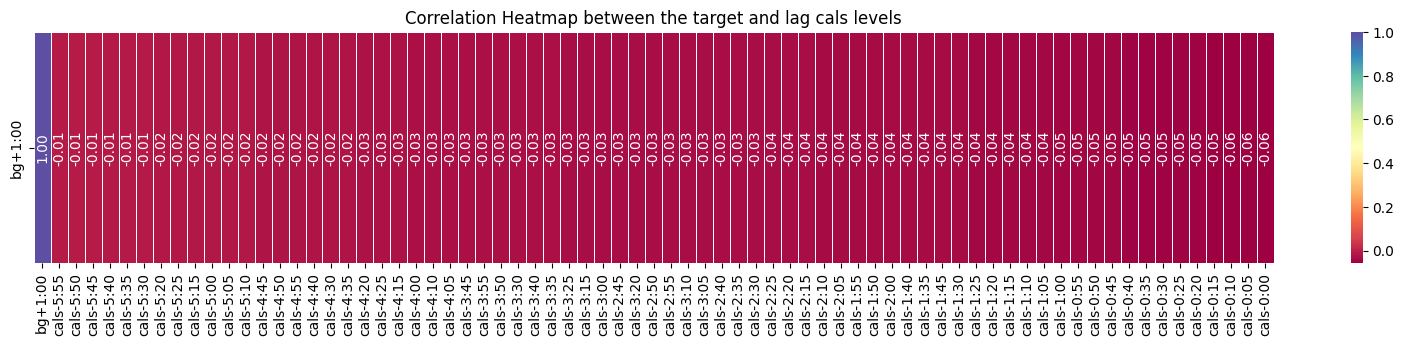

In [236]:
plt.figure(figsize=(20,3))
cols = sorted(group_cols["cals"])[:]
cols.insert(0,"bg+1:00")
data = df_train[cols].corr()[["bg+1:00"]]
data = data.sort_values(by="bg+1:00",ascending=False).T
plt.title("Correlation Heatmap between the target and lag cals levels")
heatmap = sns.heatmap(data,cmap="Spectral",linewidths=0.5,annot=True,fmt='.2f')
for text in heatmap.texts:
    text.set_rotation(90)  # Set annotations to horizontal;

**Comment:**
Like with the insulin levels, there is no linear correlation between the target and the heart rates variables.</br>
In fact, this effect is not suprising given that the cals

In [234]:
data = df_train[cols].corr()[["bg+1:00"]]
data.sort_values(by="bg+1:00",ascending=False).T

,bg+1:00,carbs-2:35,carbs-2:20,carbs-2:50,carbs-2:30,carbs-2:45,carbs-2:25,carbs-2:05,carbs-2:40,carbs-2:55,...,carbs-5:55,carbs-0:35,carbs-0:40,carbs-0:20,carbs-0:30,carbs-0:25,carbs-0:05,carbs-0:10,carbs-0:15,carbs-0:00
bg+1:00,1.0,0.172021,0.171542,0.167637,0.166296,0.164623,0.163317,0.162181,0.161964,0.159142,...,0.039877,0.034892,0.034485,0.026606,0.020884,0.018873,0.018213,0.009568,0.009065,0.007727


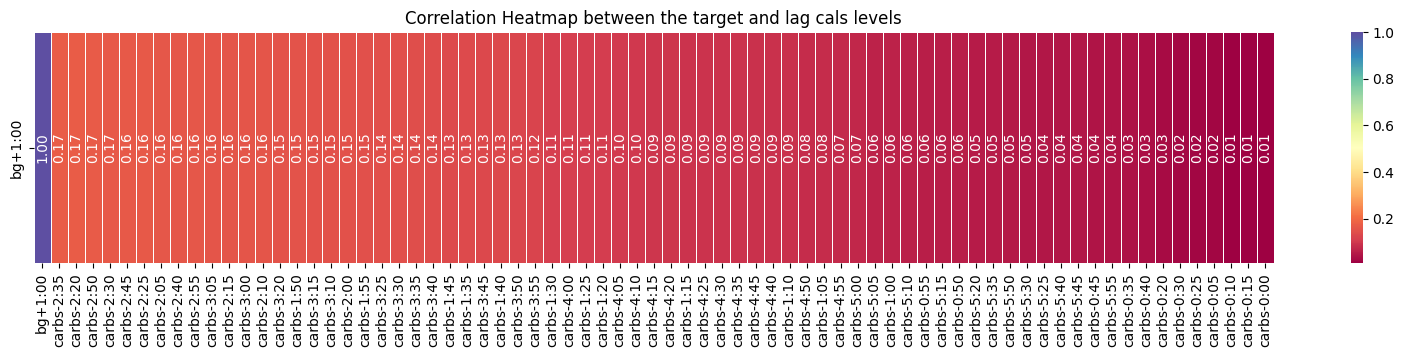

In [235]:
plt.figure(figsize=(20,3))
cols = sorted(group_cols["carbs"])[:]
cols.insert(0,"bg+1:00")
data = df_train[cols].corr()[["bg+1:00"]]
data = data.sort_values(by="bg+1:00",ascending=False).T
plt.title("Correlation Heatmap between the target and lag cals levels")
heatmap = sns.heatmap(data,cmap="Spectral",linewidths=0.5,annot=True,fmt='.2f')
for text in heatmap.texts:
    text.set_rotation(90)  # Set annotations to horizontal;

**Comment:**
The above plot shows that there is a small positive correlation between the among of carbs (food) ingested and the target variable. Moreover,according to our plot, the amount of food ingested between 2H to 3H tends to have a higher correlation to the target variable than the rest.</br>

Like the insulin, it has a non-linear effect on the blood glucose within the blood.

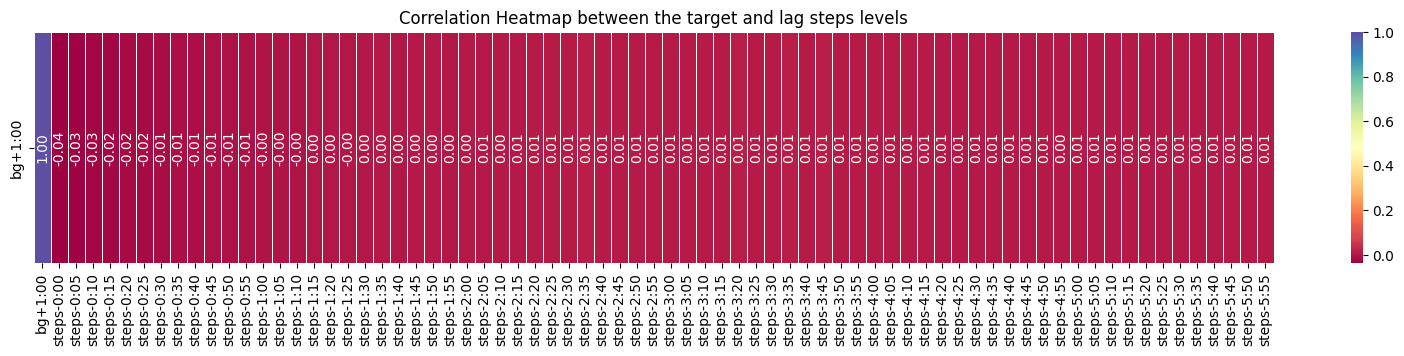

In [205]:
plt.figure(figsize=(20,3))
cols = sorted(group_cols["steps"])
cols.insert(0,"bg+1:00")
data = df_train[cols].corr()[["bg+1:00"]].T
plt.title("Correlation Heatmap between the target and lag steps levels")
heatmap = sns.heatmap(data,cmap="Spectral",linewidths=0.5,annot=True,fmt='.2f')
for text in heatmap.texts:
    text.set_rotation(90)  # Set annotations to horizontal;

**Comment:**
The above plot shows that there is a small correlation between the among of carbs (food) ingested and the target variable. Moreover,according to our plot, the amount of food ingested between 2H to 3H tends to have a higher correlation to the target variable than the rest.


**EDA Take aways:** </br>
* Some missing values imputations strategies will be necessary for bloog glucose,insulin, cals, steps, hr.
* Carbs and activity related columns will be discarded since the ratio of missing values is close to 100%
* Past bg columns have a positive   correlation with the target variable
* The other columns have a small (even close to 0) correlation with the target variable, which might be explained a an inherent no linear relationship between them and the target variable (e.g insulin).
* Feature transformations might be useful for e.g for insulin to mimic the decay behavior of insulin within the blood stream.
*  The bg values of different patients fluctuate around different intervalss